<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/Alura_NPL_analise_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import nltk
from nltk import ngrams
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import WordPunctTokenizer
import seaborn as sns
from string import punctuation

In [2]:
!pip install Unidecode
import unidecode

     |████████████████████████████████| 245kB 9.8MB/s 


In [3]:
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [4]:
!pip install wordcloud

In [5]:
from wordcloud import WordCloud

Baixar dataset do kaggle
https://www.kaggle.com/luisfredgs/imdb-ptbr

e renomear para dados.csv (esse passo é opcional, mas caso não seguido deve-se alterar o nome do arquivo no comando a seguir)

In [6]:
resenhas = pd.read_csv('dados.csv')
resenhas.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [7]:
resenhas.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [8]:
classificacao = resenhas.replace(['neg', 'pos'], [0,1])
print(classificacao)
resenhas['classificacao'] = classificacao.sentiment

          id  ... sentiment
0          1  ...         0
1          2  ...         0
2          3  ...         0
3          4  ...         0
4          5  ...         0
...      ...  ...       ...
49454  49456  ...         1
49455  49457  ...         1
49456  49458  ...         1
49457  49459  ...         1
49458  49460  ...         1

[49459 rows x 4 columns]


In [9]:
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [10]:
X_treino, X_teste, y_treino, y_teste = train_test_split(resenhas['text_pt'], resenhas['classificacao'], random_state = 42)

In [11]:
print("X Treino: ", X_treino.shape)
print("X Teste: ", X_teste.shape)
print("y Treino: ", y_treino.shape)
print("X Teste: ", y_teste.shape)

X Treino:  (37094,)
X Teste:  (12365,)
y Treino:  (37094,)
X Teste:  (12365,)


Vetorizar os dados. Começando com dados fictícios

In [12]:
dados_ficticios = ["Assisti um filme ótimo", "Assiti um filme péssimo"]

In [13]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(dados_ficticios)
bag_of_words

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [15]:
print(matriz_esparsa)

   Assisti  Assiti  filme  péssimo  um  ótimo
0        1       0      1        0   1      1
1        0       1      1        1   1      0


Aplicando nos dados reais

In [16]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenhas.text_pt)

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

print(matriz_esparsa.shape)

(49459, 50)


In [17]:
X_treino, X_teste, y_treino, y_teste = train_test_split(matriz_esparsa, resenhas['classificacao'], random_state = 42)

In [18]:
regressao_logistica = LogisticRegression(random_state=42)
regressao_logistica.fit(X_treino, y_treino)
print(regressao_logistica.score(X_teste, y_teste))

0.6583097452486858


In [19]:
def classificador(dados, coluna, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(dados[coluna])
  matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

  X_treino, X_teste, y_treino, y_teste = train_test_split(matriz_esparsa, dados[coluna_classificacao], random_state = 42)

  regressao_logistica = LogisticRegression(random_state=42)
  regressao_logistica.fit(X_treino, y_treino)
  return regressao_logistica.score(X_teste, y_teste)


In [20]:
classificacao = classificador(resenhas, "text_pt", "classificacao")
print(classificacao)

0.6583097452486858


List com todas as palavras

In [21]:
todas_palavras = " ".join([palavras for palavras in resenhas.text_pt])
len(todas_palavras)

63448424

In [22]:
nuvem_palavras = WordCloud(width=800, height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)

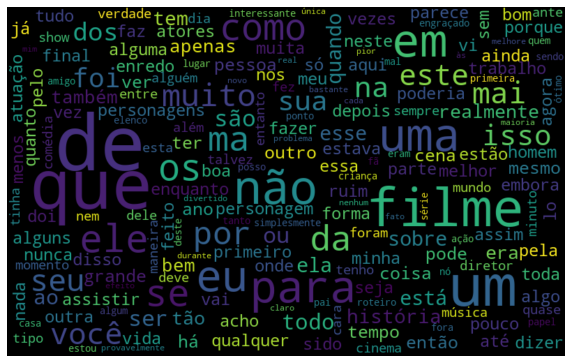

In [23]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

Separar positivo de negativo

In [24]:
negativos = resenhas.query('classificacao == 0')
negativos

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
37113,37115,"Towards the end of the movie, I felt it was to...","No final do filme, senti que era muito técnico...",neg,0
37114,37116,This is the kind of movie that my enemies cont...,Este é o tipo de filme que meus inimigos me as...,neg,0
37115,37117,I saw Descent last night at the Stockholm Film...,Eu vi Descent na noite passada no Stockholm Fi...,neg,0
37116,37118,Some films that you pick up for a pound turn o...,Alguns filmes que você escolhe por um quilo sã...,neg,0


In [25]:
def nuvem_neg(dados, coluna):
  negativos = dados.query('classificacao == 0')
  todas_palavras = " ".join([palavras for palavras in negativos[coluna]])
  nuvem_palavras = WordCloud(width=800, height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [26]:
def nuvem_pos(dados, coluna):
  positivos = dados.query('classificacao == 1')
  todas_palavras = " ".join([palavras for palavras in positivos[coluna]])
  nuvem_palavras = WordCloud(width=800, height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

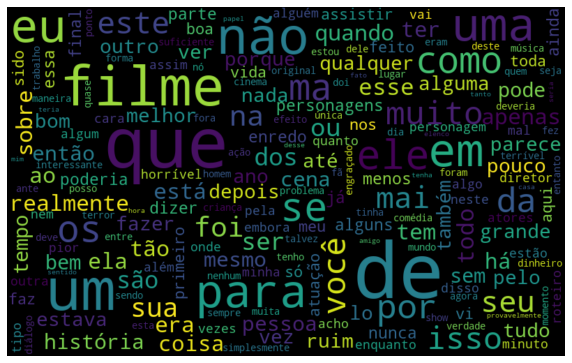

In [27]:
nuvem_neg(resenhas, 'text_pt')

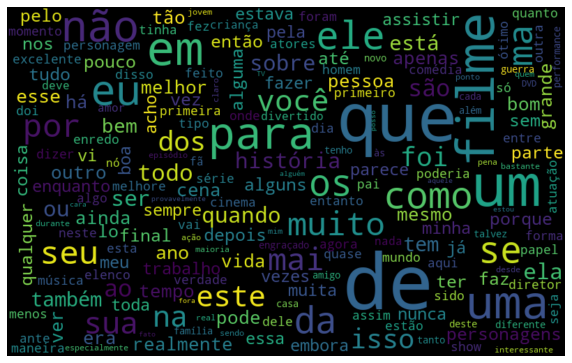

In [28]:
nuvem_pos(resenhas, 'text_pt')

Criando e contando os tokens

In [29]:
tokenizador = WhitespaceTokenizer()
tokens = tokenizador.tokenize(todas_palavras)
print(tokens)

frequencia = nltk.FreqDist(tokens)
frequencia

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



FreqDist({'Mais': 1538,
          'uma': 130888,
          'vez,': 1927,
          'o': 244881,
          'Sr.': 1741,
          'Costner': 50,
          'arrumou': 3,
          'um': 216410,
          'filme': 117543,
          'por': 61339,
          'muito': 51761,
          'mais': 53504,
          'tempo': 10424,
          'do': 101737,
          'que': 325070,
          'necessário.': 135,
          'Além': 3631,
          'das': 16496,
          'terríveis': 576,
          'seqüências': 586,
          'de': 417651,
          'resgate': 152,
          'no': 57145,
          'mar,': 63,
          'quais': 1537,
          'há': 15824,
          'poucas,': 7,
          'eu': 68814,
          'simplesmente': 6436,
          'não': 127915,
          'me': 19136,
          'importei': 109,
          'com': 99174,
          'nenhum': 4531,
          'dos': 41222,
          'personagens.': 1027,
          'A': 31547,
          'maioria': 5565,
          'nós': 3944,
          'tem': 2498

In [30]:
tokens_df = pd.DataFrame({'Palavras' : list(frequencia.keys()), 'Frequencia' : list(frequencia.values())})
tokens_df.nlargest(10, 'Frequencia')

,Palavras,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


Visualizando a frequencia

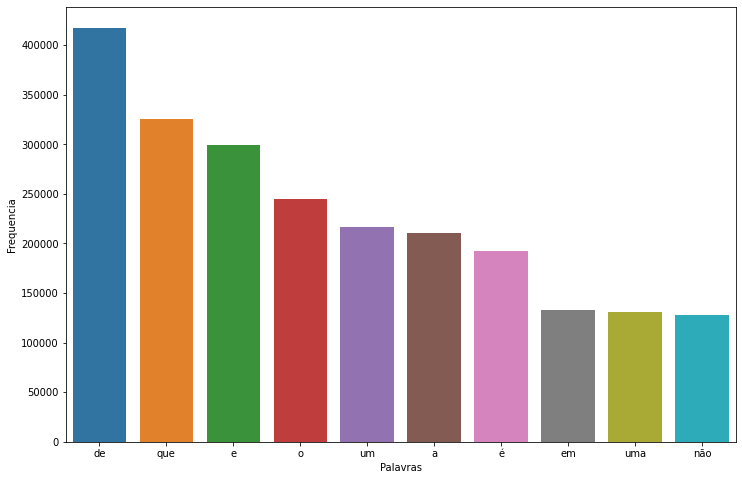

In [31]:
plt.figure(figsize = (12,8))
top10 = tokens_df.nlargest(10, 'Frequencia')

ax = sns.barplot(x='Palavras', y='Frequencia', data=top10)

In [32]:
def pareto(dados, coluna, quantidade):
  todas_palavras = " ".join([palavras for palavras in dados[coluna]])
  tokenizador = WhitespaceTokenizer()
  tokens = tokenizador.tokenize(todas_palavras)
  
  frequencia = nltk.FreqDist(tokens)

  tokens_df = pd.DataFrame({'Palavras' : list(frequencia.keys()), 'Frequencia' : list(frequencia.values())})
  top10 = tokens_df.nlargest(quantidade, 'Frequencia')

  plt.figure(figsize = (12,8))

  ax = sns.barplot(x='Palavras', y='Frequencia', data=top10)

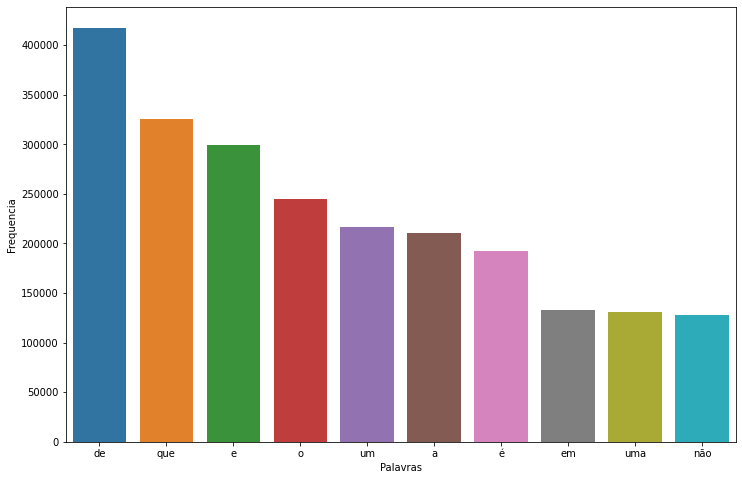

In [33]:
pareto(resenhas, 'text_pt', 10)

Stopwords do NLTK

In [34]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [35]:
frases_processadas = []
tokenizador = WhitespaceTokenizer()
for frase in resenhas.text_pt:
  tokens = tokenizador.tokenize(frase)
  nova_frase = list()
  for palavra in tokens:
    if palavra not in stopwords:
      nova_frase.append(palavra)
  frases_processadas.append(" ".join(nova_frase))
resenhas["frases_processadas1"] = frases_processadas
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,frases_processadas1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [36]:
classificacao = classificador(resenhas, "frases_processadas1", "classificacao")
print(classificacao)

0.6607359482410028


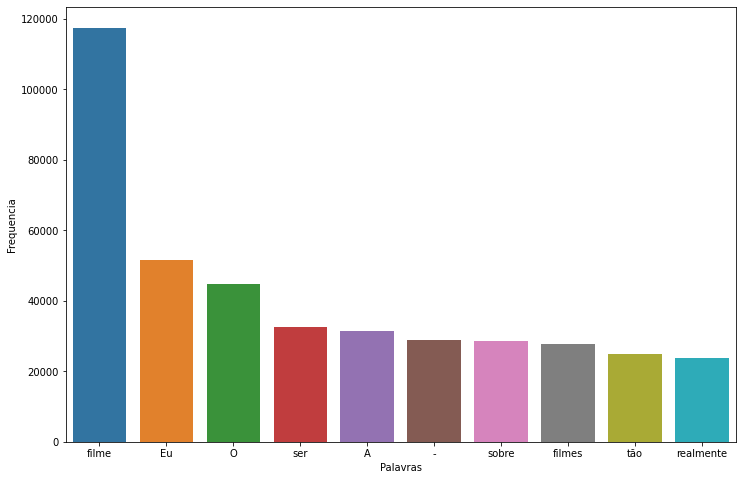

In [37]:
pareto(resenhas, 'frases_processadas1', 10)

In [38]:
pontuacao = list(punctuation)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [39]:
pontuacao_stopwords = pontuacao + stopwords

In [40]:
frases_processadas = []
tokenizador = WordPunctTokenizer()
for frase in resenhas.frases_processadas1:
  tokens = tokenizador.tokenize(frase)
  nova_frase = list()
  for palavra in tokens:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frases_processadas.append(" ".join(nova_frase))
resenhas["frases_processadas2"] = frases_processadas
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,frases_processadas1,frases_processadas2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [41]:
resenhas['frases_processadas1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [42]:
resenhas['frases_processadas2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

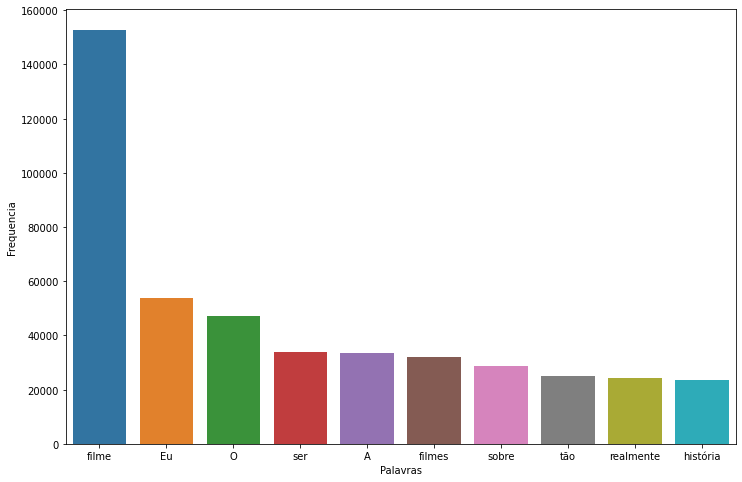

In [43]:
pareto(resenhas,'frases_processadas2',10)

In [44]:
frases_processadas = []
tokenizador = WordPunctTokenizer()
for frase in resenhas.frases_processadas2:
  frase = unidecode.unidecode(frase)
  tokens = tokenizador.tokenize(frase)
  nova_frase = list()
  for palavra in tokens:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frases_processadas.append(" ".join(nova_frase))
resenhas["frases_processadas3"] = frases_processadas
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,frases_processadas1,frases_processadas2,frases_processadas3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [45]:
pontuacao_stopwords = [unidecode.unidecode(palavra) for palavra in pontuacao_stopwords]

In [46]:
pontuacao_stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [47]:
frases_processadas = []
tokenizador = WordPunctTokenizer()
for frase in resenhas.frases_processadas3:
  frase = unidecode.unidecode(frase)
  tokens = tokenizador.tokenize(frase)
  nova_frase = list()
  for palavra in tokens:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frases_processadas.append(" ".join(nova_frase))
resenhas["frases_processadas3"] = frases_processadas
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,frases_processadas1,frases_processadas2,frases_processadas3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [48]:
resenhas["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [49]:
resenhas["frases_processadas3"][0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

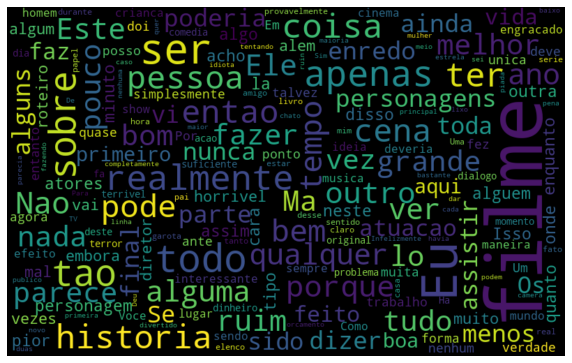

In [50]:
nuvem_neg(resenhas, "frases_processadas3")

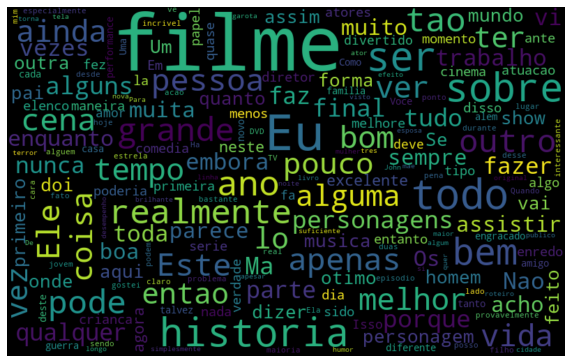

In [51]:
nuvem_pos(resenhas, "frases_processadas3")

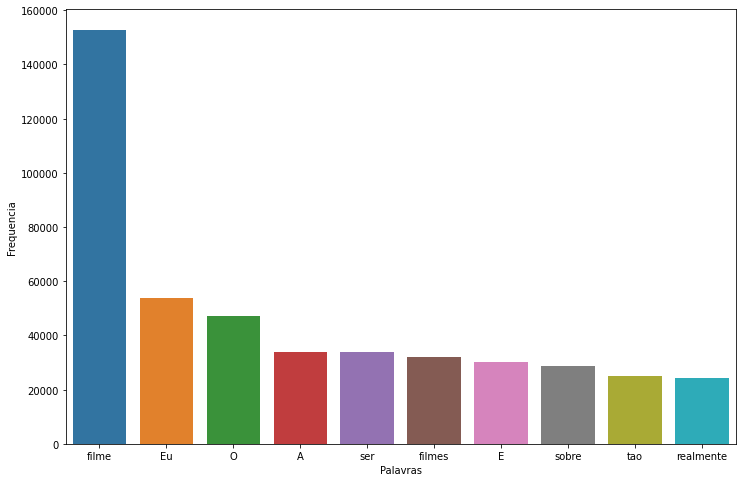

In [52]:
pareto(resenhas, 'frases_processadas3', 10)

In [53]:
frases_processadas = []
tokenizador = WordPunctTokenizer()
for frase in resenhas.frases_processadas3:
  frase = unidecode.unidecode(frase)
  frase = frase.lower()
  tokens = tokenizador.tokenize(frase)
  nova_frase = list()
  for palavra in tokens:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frases_processadas.append(" ".join(nova_frase))
resenhas["frases_processadas4"] = frases_processadas
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,frases_processadas1,frases_processadas2,frases_processadas3,frases_processadas4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [54]:
resenhas["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [55]:
resenhas["frases_processadas4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

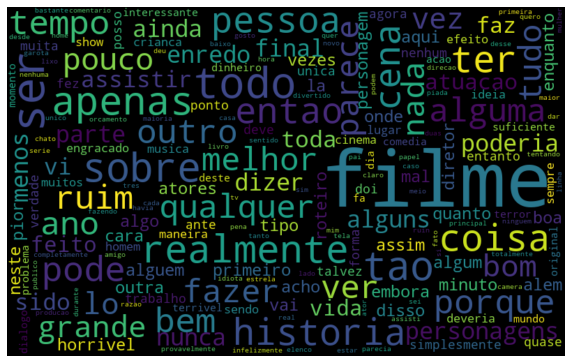

In [56]:
nuvem_neg(resenhas, "frases_processadas4")

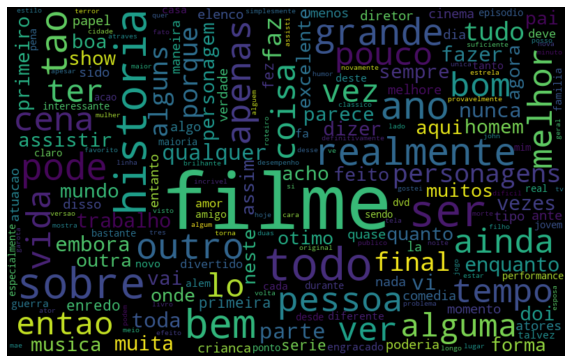

In [57]:
nuvem_pos(resenhas, "frases_processadas4")

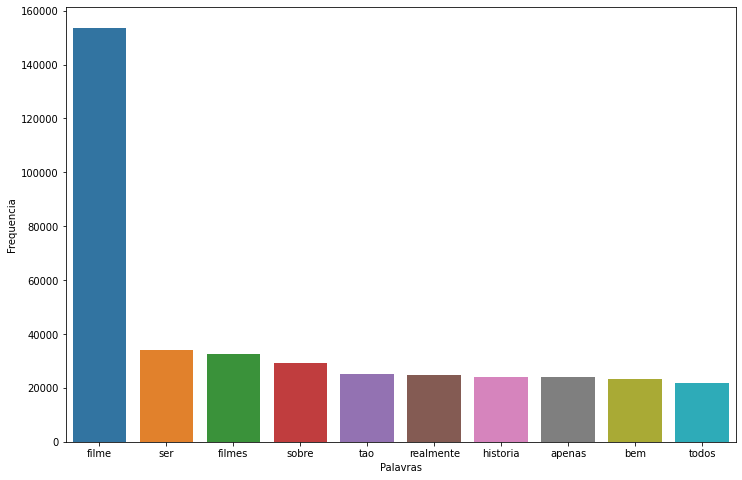

In [58]:
pareto(resenhas, "frases_processadas4", 10)

In [59]:
classificacao1 = classificador(resenhas, "frases_processadas1", "classificacao")
print("Classificação 1:", classificacao1)

classificacao2 = classificador(resenhas, "frases_processadas2", "classificacao")
print("Classificação 2:", classificacao2)

classificacao3 = classificador(resenhas, "frases_processadas3", "classificacao")
print("Classificação 3:", classificacao3)

classificacao4 = classificador(resenhas, "frases_processadas4", "classificacao")
print("Classificação 4:", classificacao4)

Classificação 1: 0.6607359482410028
Classificação 2: 0.681196926809543
Classificação 3: 0.6810351799433886
Classificação 4: 0.6879094217549535


In [60]:
stemmer = nltk.RSLPStemmer()

In [61]:
frases_processadas = []
tokenizador = WordPunctTokenizer()
for frase in resenhas.frases_processadas4:
  tokens = tokenizador.tokenize(frase)
  nova_frase = list()
  for palavra in tokens:
    nova_frase.append(stemmer.stem(palavra))
  frases_processadas.append(" ".join(nova_frase))
resenhas["frases_processadas5"] = frases_processadas
resenhas.head()

,id,text_en,text_pt,sentiment,classificacao,frases_processadas1,frases_processadas2,frases_processadas3,frases_processadas4,frases_processadas5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [62]:
print("Classificação 4:", classificacao4)

classificacao4 = classificador(resenhas, "frases_processadas5", "classificacao")
print("Classificação 5:", classificacao4)

Classificação 4: 0.6879094217549535
Classificação 5: 0.6943792964011323


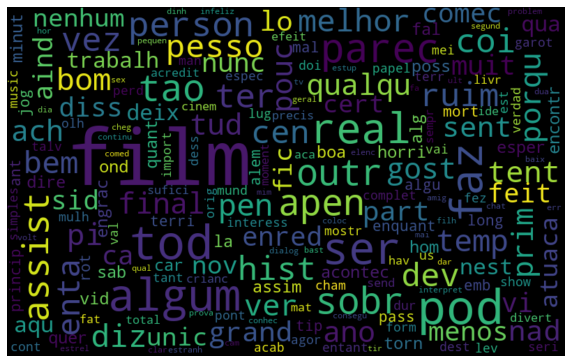

In [63]:
nuvem_neg(resenhas, "frases_processadas5")

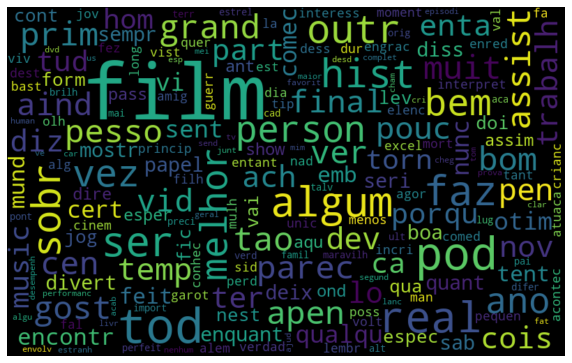

In [64]:
nuvem_pos(resenhas, "frases_processadas5")

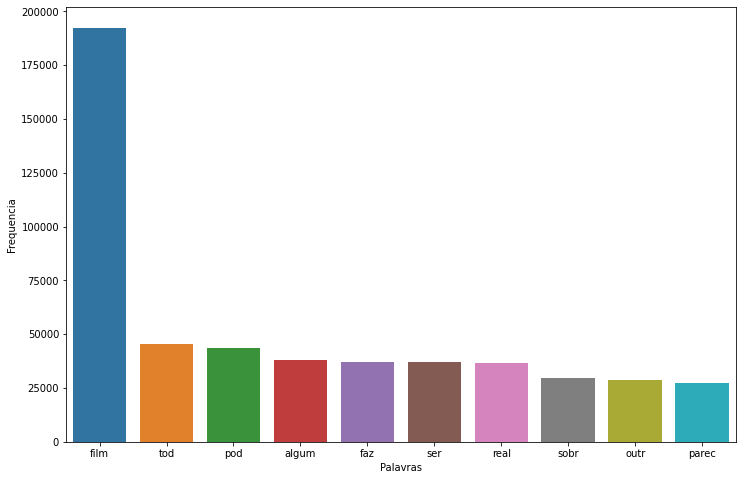

In [65]:
pareto(resenhas, "frases_processadas5", 10)

In [66]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [67]:
tfidf_bruto = tfidf.fit_transform(resenhas['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenhas['classificacao'],
                                                              random_state=42)
regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [68]:
tfidf_processada = tfidf.fit_transform(resenhas['frases_processadas5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_processada, resenhas['classificacao'],
                                                              random_state=42)
regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_processada = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_processada)

0.6988273352203801


In [70]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))

In [71]:
tfidf_ngrams = tfidf.fit_transform(resenhas['frases_processadas5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_ngrams, resenhas['classificacao'],
                                                              random_state=42)
regressao_logistica.fit(treino, classe_treino)

acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [73]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T,
                     index = tfidf.get_feature_names())
pesos.nlargest(50,0)

,0
otim,9.883148
excel,8.998212
perfeit,6.909051
maravilh,6.277557
favorit,5.888959
incri,5.746389
divert,5.411610
brilh,4.856989
ador,4.570598
hoj,4.491365


In [74]:
pesos.nsmallest(50,0)

,0
ruim,-11.761766
pi,-11.424122
horri,-9.701481
terri,-8.386112
nad,-7.610627
chat,-7.508107
parec,-6.628180
nenhum,-6.369930
tent,-5.774706
mal,-5.710310
